In [277]:
import pandas as pd

In [278]:
data_df = pd.read_csv('features_compiled.csv', sep='\t')
data_df.head()

,Unnamed: 0.1,Unnamed: 0,author_id,sex,age,occupation,zodiac_sign,post,all_features,token_count,...,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,irony,sarcasm,topic
0,208681,208681,15365,female,34,indUnk,Cancer,\n,"[0, 0, 0, 0]",0,...,0,0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,7
1,413176,413176,2970791,male,14,Student,Sagittarius,\n\n\t\t\t\t\t\t\t \n\t\t\t\t\t\t\t\t \n\t\t\t...,"[266, 14, 1, 3]",266,...,1,3,0.071429,0.003759,0.214286,0.011278,1.0,0.0,0.0,7
2,413174,413174,2970791,male,14,Student,Sagittarius,\n\n\t\t\t\t\t\t\t \n\t\t\t\t\t\t\t\t \n\t\t\t...,"[169, 9, 6, 1]",169,...,6,1,0.666667,0.035503,0.111111,0.005917,0.0,0.0,0.0,7
3,413169,413169,2970791,male,14,Student,Sagittarius,\n\n\t\t\t\t\t\t\t T he hottest person in the...,"[128, 4, 4, 1]",128,...,4,1,1.000000,0.031250,0.250000,0.007812,1.0,1.0,0.0,7
4,413173,413173,2970791,male,14,Student,Sagittarius,"\n\n\t\t\t\t\t\t\t ""The young captain [Pieter]...","[361, 22, 14, 23]",361,...,14,23,0.636364,0.038781,1.045455,0.063712,0.0,0.0,0.0,7


In [279]:
data_df = data_df.fillna(0)

In [280]:
data_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'author_id', 'sex', 'age', 'occupation',
       'zodiac_sign', 'post', 'all_features', 'token_count', 'sent_count',
       'pron_count', 'punct_count', 'pron_per_sents', 'pron_per_tokens',
       'punct_per_sents', 'punct_per_tokens', 'sentiment', 'irony', 'sarcasm',
       'topic'],
      dtype='object')

In [281]:
features_to_aggregate = ['sent_count',
       'pron_count', 'punct_count', 'pron_per_sents', 'pron_per_tokens',
       'punct_per_sents', 'punct_per_tokens', 'sentiment', 'irony', 'sarcasm']

In [282]:
aggregated_df =  data_df.groupby('author_id').agg({'token_count': ['mean']})

for feature in features_to_aggregate:
    agg_df =  data_df.groupby('author_id').agg({feature: ['mean']})
    aggregated_df = aggregated_df.join(agg_df)


In [283]:
aggregated_df.columns = [col[0] for col in aggregated_df.columns.to_flat_index()]
aggregated_df

,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,irony,sarcasm
author_id,,,,,,,,,,,
5114,44.421320,2.776650,0.873096,0.243655,0.303591,0.020223,0.075961,0.010366,0.497462,0.294416,0.000000
7596,221.285714,13.500000,9.214286,3.500000,0.730029,0.047171,0.230139,0.013910,0.000000,0.000000,0.000000
8349,60.826087,3.318841,3.043478,0.275362,0.902231,0.044098,0.065079,0.004323,0.434783,0.347826,0.000000
9289,322.443182,13.784091,17.715909,10.613636,2.000820,0.050114,1.186616,0.041662,0.681818,0.681818,0.056818
9470,56.285714,3.221289,1.162465,1.319328,0.429882,0.030611,0.598600,0.042730,0.599440,0.403361,0.022409
...,...,...,...,...,...,...,...,...,...,...,...
4336547,579.000000,32.000000,56.000000,0.000000,1.750000,0.096718,0.000000,0.000000,0.000000,0.000000,0.000000
4336651,500.000000,40.000000,51.000000,11.000000,1.275000,0.102000,0.275000,0.022000,0.000000,1.000000,0.000000
4336871,561.000000,24.000000,29.000000,3.000000,1.208333,0.051693,0.125000,0.005348,0.000000,0.000000,0.000000


In [284]:
topics_mentioned = data_df.groupby('author_id').agg({'topic': lambda x: list(set(list(x)))})
aggregated_df = aggregated_df.join(topics_mentioned)

In [285]:
id2sign = {auth_id: sign for auth_id, sign in zip(data_df.author_id, data_df.zodiac_sign)}
id2occup = {auth_id: occup for auth_id, occup in zip(data_df.author_id, data_df.occupation)}

In [286]:
aggregated_df = aggregated_df.reset_index()

In [287]:
aggregated_df

,author_id,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,irony,sarcasm,topic
0,5114,44.421320,2.776650,0.873096,0.243655,0.303591,0.020223,0.075961,0.010366,0.497462,0.294416,0.000000,"[3, 7, 8, 9, 11, 12, 14, 16, 17, 19, 22, 29]"
1,7596,221.285714,13.500000,9.214286,3.500000,0.730029,0.047171,0.230139,0.013910,0.000000,0.000000,0.000000,"[12, 7]"
2,8349,60.826087,3.318841,3.043478,0.275362,0.902231,0.044098,0.065079,0.004323,0.434783,0.347826,0.000000,"[7, 12, 14, 19, 22]"
3,9289,322.443182,13.784091,17.715909,10.613636,2.000820,0.050114,1.186616,0.041662,0.681818,0.681818,0.056818,"[12, 7]"
4,9470,56.285714,3.221289,1.162465,1.319328,0.429882,0.030611,0.598600,0.042730,0.599440,0.403361,0.022409,"[2, 6, 7, 8, 9, 11, 12, 14, 16, 17, 21, 28]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,4336547,579.000000,32.000000,56.000000,0.000000,1.750000,0.096718,0.000000,0.000000,0.000000,0.000000,0.000000,[7]
18979,4336651,500.000000,40.000000,51.000000,11.000000,1.275000,0.102000,0.275000,0.022000,0.000000,1.000000,0.000000,[7]
18980,4336871,561.000000,24.000000,29.000000,3.000000,1.208333,0.051693,0.125000,0.005348,0.000000,0.000000,0.000000,[7]
18981,4337133,414.500000,32.500000,20.500000,21.500000,0.598039,0.046085,0.770833,0.058056,0.000000,0.000000,0.000000,[7]


In [288]:
aggregated_df['zodiac_sign'] = aggregated_df.author_id.apply(lambda x: id2sign[x])
aggregated_df['occupation'] = aggregated_df.author_id.apply(lambda x: id2occup[x])

In [289]:
aggregated_df

,author_id,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,irony,sarcasm,topic,zodiac_sign,occupation
0,5114,44.421320,2.776650,0.873096,0.243655,0.303591,0.020223,0.075961,0.010366,0.497462,0.294416,0.000000,"[3, 7, 8, 9, 11, 12, 14, 16, 17, 19, 22, 29]",Scorpio,indUnk
1,7596,221.285714,13.500000,9.214286,3.500000,0.730029,0.047171,0.230139,0.013910,0.000000,0.000000,0.000000,"[12, 7]",Scorpio,Internet
2,8349,60.826087,3.318841,3.043478,0.275362,0.902231,0.044098,0.065079,0.004323,0.434783,0.347826,0.000000,"[7, 12, 14, 19, 22]",Cancer,Consulting
3,9289,322.443182,13.784091,17.715909,10.613636,2.000820,0.050114,1.186616,0.041662,0.681818,0.681818,0.056818,"[12, 7]",Taurus,Marketing
4,9470,56.285714,3.221289,1.162465,1.319328,0.429882,0.030611,0.598600,0.042730,0.599440,0.403361,0.022409,"[2, 6, 7, 8, 9, 11, 12, 14, 16, 17, 21, 28]",Aries,Communications-Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,4336547,579.000000,32.000000,56.000000,0.000000,1.750000,0.096718,0.000000,0.000000,0.000000,0.000000,0.000000,[7],Sagittarius,Communications-Media
18979,4336651,500.000000,40.000000,51.000000,11.000000,1.275000,0.102000,0.275000,0.022000,0.000000,1.000000,0.000000,[7],Sagittarius,Tourism
18980,4336871,561.000000,24.000000,29.000000,3.000000,1.208333,0.051693,0.125000,0.005348,0.000000,0.000000,0.000000,[7],Libra,Automotive
18981,4337133,414.500000,32.500000,20.500000,21.500000,0.598039,0.046085,0.770833,0.058056,0.000000,0.000000,0.000000,[7],Virgo,Student


In [290]:
aggregated_df = pd.get_dummies(aggregated_df, columns=['occupation'])

In [291]:
aggregated_df.head()

,author_id,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,...,occupation_RealEstate,occupation_Religion,occupation_Science,occupation_Sports-Recreation,occupation_Student,occupation_Technology,occupation_Telecommunications,occupation_Tourism,occupation_Transportation,occupation_indUnk
0,5114,44.421320,2.776650,0.873096,0.243655,0.303591,0.020223,0.075961,0.010366,0.497462,...,False,False,False,False,False,False,False,False,False,True
1,7596,221.285714,13.500000,9.214286,3.500000,0.730029,0.047171,0.230139,0.013910,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,8349,60.826087,3.318841,3.043478,0.275362,0.902231,0.044098,0.065079,0.004323,0.434783,...,False,False,False,False,False,False,False,False,False,False
3,9289,322.443182,13.784091,17.715909,10.613636,2.000820,0.050114,1.186616,0.041662,0.681818,...,False,False,False,False,False,False,False,False,False,False
4,9470,56.285714,3.221289,1.162465,1.319328,0.429882,0.030611,0.598600,0.042730,0.599440,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

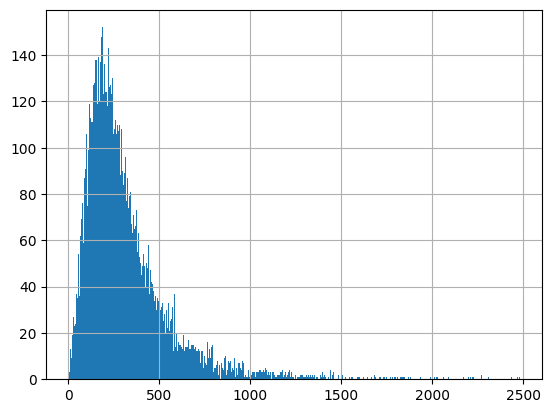

In [292]:
aggregated_df[aggregated_df.token_count < 2500].token_count.hist(bins=1000)

In [293]:
aggregated_df['token_count'] = pd.cut(aggregated_df['token_count'], 
                                      [0, 150, 300, 450, 600, 1000, 1500, max(aggregated_df['token_count'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

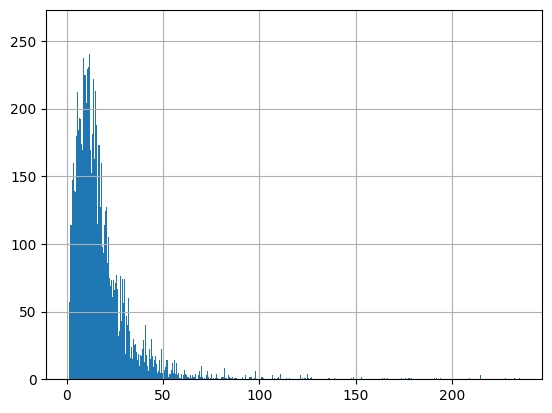

In [294]:
aggregated_df[aggregated_df.sent_count < 250].sent_count.hist(bins=1000)

In [295]:
aggregated_df['sent_count'] = pd.cut(aggregated_df['sent_count'], 
                                      [0, 15, 30, 45, 60, 100, 150, max(aggregated_df['sent_count'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

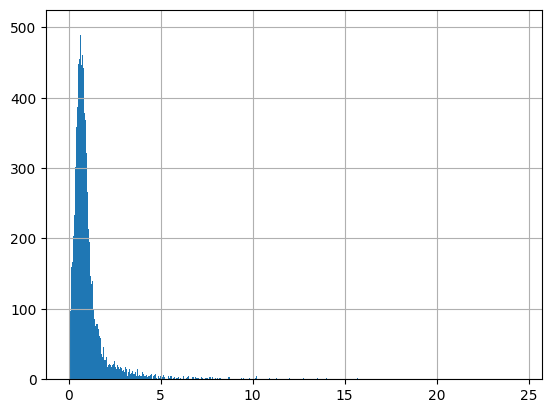

In [296]:
aggregated_df[aggregated_df.pron_per_sents < 25].pron_per_sents.hist(bins=1000)

In [297]:
aggregated_df['pron_per_sents'] = pd.cut(aggregated_df['pron_per_sents'], 
                                      [0, 1, 2, 3, 4, 5, 10, max(aggregated_df['pron_per_sents'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

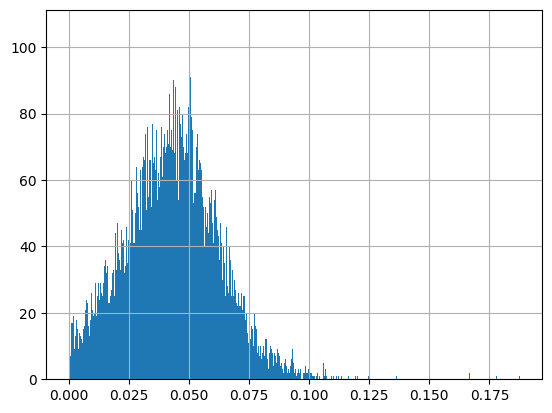

In [298]:
aggregated_df.pron_per_tokens.hist(bins=1000)

In [299]:
aggregated_df['pron_per_tokens'] = pd.cut(aggregated_df['pron_per_tokens'], 
                                      [0, 0.025, 0.050, 0.075, 0.1, max(aggregated_df['pron_per_tokens'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

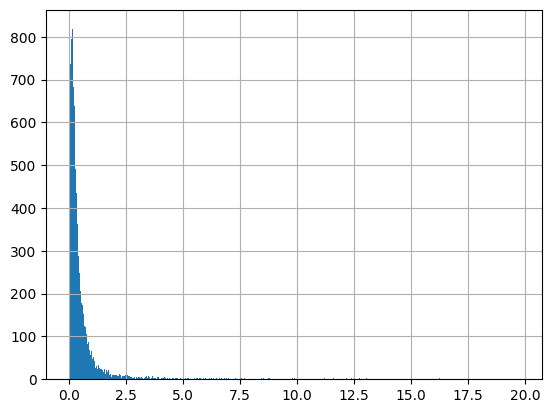

In [300]:
aggregated_df[aggregated_df.punct_per_sents < 20].punct_per_sents.hist(bins=1000)

In [301]:
aggregated_df['punct_per_sents'] = pd.cut(aggregated_df['punct_per_sents'], 
                                      [0, 1, 2, 3, 5, 10, max(aggregated_df['punct_per_sents'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

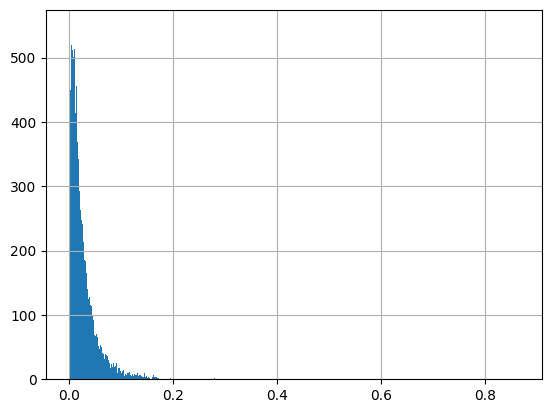

In [302]:
aggregated_df[aggregated_df.punct_per_tokens < 1].punct_per_tokens.hist(bins=1000)

In [303]:
aggregated_df['punct_per_tokens'] = pd.cut(aggregated_df['punct_per_tokens'], 
                                      [0, 0.1, 0.2, max(aggregated_df['punct_per_tokens'])], 
                                      right=True, 
                                      include_lowest=True)

<Axes: >

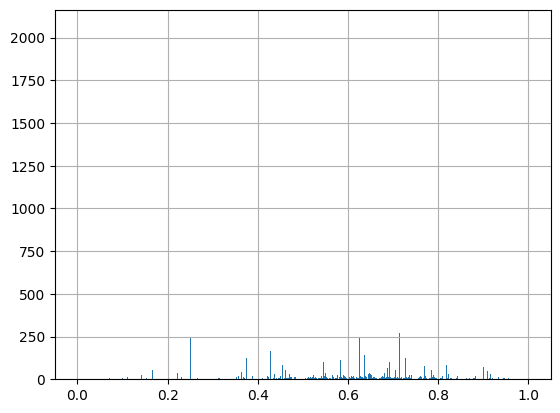

In [304]:
aggregated_df.sentiment.hist(bins=1000)

In [305]:
aggregated_df['sentiment'] = pd.cut(aggregated_df['sentiment'], 
                                      [0, 0.2, 0.4, 0.6, 0.8, max(aggregated_df['sentiment'])], 
                                      right=False, 
                                      include_lowest=True)

<Axes: >

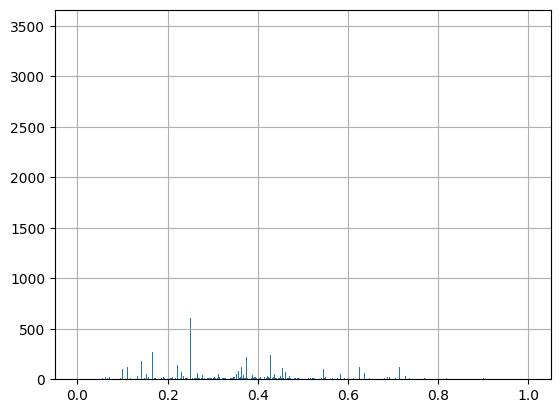

In [306]:
aggregated_df.irony.hist(bins=1000)

In [307]:
aggregated_df['irony'] = pd.cut(aggregated_df['irony'], 
                                      [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                      right=True, 
                                      include_lowest=True)

In [308]:
aggregated_df['sarcasm'] = pd.cut(aggregated_df['sarcasm'], 
                                      [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                      right=True, 
                                      include_lowest=True)

In [309]:
aggregated_df.head()

,author_id,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,...,occupation_RealEstate,occupation_Religion,occupation_Science,occupation_Sports-Recreation,occupation_Student,occupation_Technology,occupation_Telecommunications,occupation_Tourism,occupation_Transportation,occupation_indUnk
0,5114,"(-0.001, 150.0]","(-0.001, 15.0]",0.873096,0.243655,"(-0.001, 1.0]","(-0.001, 0.025]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,False,False,False,False,False,False,False,False,False,True
1,7596,"(150.0, 300.0]","(-0.001, 15.0]",9.214286,3.500000,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.0, 0.2)",...,False,False,False,False,False,False,False,False,False,False
2,8349,"(-0.001, 150.0]","(-0.001, 15.0]",3.043478,0.275362,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,False,False,False,False,False,False,False,False,False,False
3,9289,"(300.0, 450.0]","(-0.001, 15.0]",17.715909,10.613636,"(2.0, 3.0]","(0.05, 0.075]","(1.0, 2.0]","(-0.001, 0.1]","[0.6, 0.8)",...,False,False,False,False,False,False,False,False,False,False
4,9470,"(-0.001, 150.0]","(-0.001, 15.0]",1.162465,1.319328,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,False,False,False,False,False,False,False,False,False,False


In [310]:
aggregated_df.topic

0        [3, 7, 8, 9, 11, 12, 14, 16, 17, 19, 22, 29]
1                                             [12, 7]
2                                 [7, 12, 14, 19, 22]
3                                             [12, 7]
4         [2, 6, 7, 8, 9, 11, 12, 14, 16, 17, 21, 28]
                             ...                     
18978                                             [7]
18979                                             [7]
18980                                             [7]
18981                                             [7]
18982                                             [7]
Name: topic, Length: 18983, dtype: object

In [311]:
topics_exploded = pd.crosstab((s:=aggregated_df['topic'].explode()).index, s)
topics_exploded.columns = ['topic_'+str(top) for top in topics_exploded.columns]
topics_exploded.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [312]:
aggregated_df = pd.concat([aggregated_df, topics_exploded], axis=1)
aggregated_df.head()

,author_id,token_count,sent_count,pron_count,punct_count,pron_per_sents,pron_per_tokens,punct_per_sents,punct_per_tokens,sentiment,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,5114,"(-0.001, 150.0]","(-0.001, 15.0]",0.873096,0.243655,"(-0.001, 1.0]","(-0.001, 0.025]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,0,0,1,0,0,0,0,0,0,1
1,7596,"(150.0, 300.0]","(-0.001, 15.0]",9.214286,3.500000,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.0, 0.2)",...,0,0,0,0,0,0,0,0,0,0
2,8349,"(-0.001, 150.0]","(-0.001, 15.0]",3.043478,0.275362,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,0,0,1,0,0,0,0,0,0,0
3,9289,"(300.0, 450.0]","(-0.001, 15.0]",17.715909,10.613636,"(2.0, 3.0]","(0.05, 0.075]","(1.0, 2.0]","(-0.001, 0.1]","[0.6, 0.8)",...,0,0,0,0,0,0,0,0,0,0
4,9470,"(-0.001, 150.0]","(-0.001, 15.0]",1.162465,1.319328,"(-0.001, 1.0]","(0.025, 0.05]","(-0.001, 1.0]","(-0.001, 0.1]","[0.4, 0.6)",...,0,1,0,0,0,0,0,0,1,0


In [313]:
aggregated_df.columns

Index(['author_id', 'token_count', 'sent_count', 'pron_count', 'punct_count',
       'pron_per_sents', 'pron_per_tokens', 'punct_per_sents',
       'punct_per_tokens', 'sentiment', 'irony', 'sarcasm', 'topic',
       'zodiac_sign', 'occupation_Accounting', 'occupation_Advertising',
       'occupation_Agriculture', 'occupation_Architecture', 'occupation_Arts',
       'occupation_Automotive', 'occupation_Banking', 'occupation_Biotech',
       'occupation_BusinessServices', 'occupation_Chemicals',
       'occupation_Communications-Media', 'occupation_Construction',
       'occupation_Consulting', 'occupation_Education',
       'occupation_Engineering', 'occupation_Environment',
       'occupation_Fashion', 'occupation_Government',
       'occupation_HumanResources', 'occupation_Internet',
       'occupation_InvestmentBanking', 'occupation_Law',
       'occupation_LawEnforcement-Security', 'occupation_Manufacturing',
       'occupation_Maritime', 'occupation_Marketing', 'occupation_Militar

In [314]:
aggregated_df.drop(columns=['topic', 'pron_count', 'punct_count'], inplace=True)

In [315]:
aggregated_df = pd.get_dummies(aggregated_df, columns=['zodiac_sign', 'token_count', 'sent_count',
       'pron_per_sents', 'pron_per_tokens', 'punct_per_sents', 'punct_per_tokens', 'sentiment', 'irony', 'sarcasm'])

In [316]:
aggregated_df = aggregated_df*1

In [317]:
for col in aggregated_df.columns:
    print(col)

author_id
occupation_Accounting
occupation_Advertising
occupation_Agriculture
occupation_Architecture
occupation_Arts
occupation_Automotive
occupation_Banking
occupation_Biotech
occupation_BusinessServices
occupation_Chemicals
occupation_Communications-Media
occupation_Construction
occupation_Consulting
occupation_Education
occupation_Engineering
occupation_Environment
occupation_Fashion
occupation_Government
occupation_HumanResources
occupation_Internet
occupation_InvestmentBanking
occupation_Law
occupation_LawEnforcement-Security
occupation_Manufacturing
occupation_Maritime
occupation_Marketing
occupation_Military
occupation_Museums-Libraries
occupation_Non-Profit
occupation_Publishing
occupation_RealEstate
occupation_Religion
occupation_Science
occupation_Sports-Recreation
occupation_Student
occupation_Technology
occupation_Telecommunications
occupation_Tourism
occupation_Transportation
occupation_indUnk
topic_0
topic_1
topic_2
topic_3
topic_4
topic_5
topic_6
topic_7
topic_8
topic_9

In [318]:
aggregated_df.to_csv('features_aggregated.csv', sep='\t')

In [319]:
aggregated_df.shape

(18983, 133)